In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_excel('Sample - Superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [6]:
df['Country/Region'].nunique()

1

In [7]:
df.drop(columns = ['Country/Region'],inplace = True)

In [8]:
df.drop(columns = ['Row ID', 'Order ID'],inplace = True)

In [9]:
df.drop(columns = ['Postal Code'],inplace = True)

<AxesSubplot:ylabel='Category'>

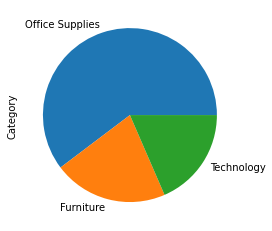

In [10]:
df['Category'].value_counts().plot(kind = 'pie')

In [11]:
df.groupby('Category')['Sub-Category'].value_counts()

Category         Sub-Category
Furniture        Furnishings      957
                 Chairs           617
                 Tables           319
                 Bookcases        228
Office Supplies  Binders         1523
                 Paper           1370
                 Storage          846
                 Art              796
                 Appliances       466
                 Labels           364
                 Envelopes        254
                 Fasteners        217
                 Supplies         190
Technology       Phones           889
                 Accessories      775
                 Machines         115
                 Copiers           68
Name: Sub-Category, dtype: int64

In [12]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [72]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Profit Percentage
0,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2019,16.00
1,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2019,30.00
2,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2019,47.00
3,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2018,-40.00
4,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2018,11.25


In [16]:
df['month']=df['Order Date'].dt.month

In [17]:
df['year'] = df['Order Date'].dt.year

In [71]:
df['Profit Percentage'] = (df['Profit']/df['Sales']) * 100

<AxesSubplot:xlabel='year,month'>

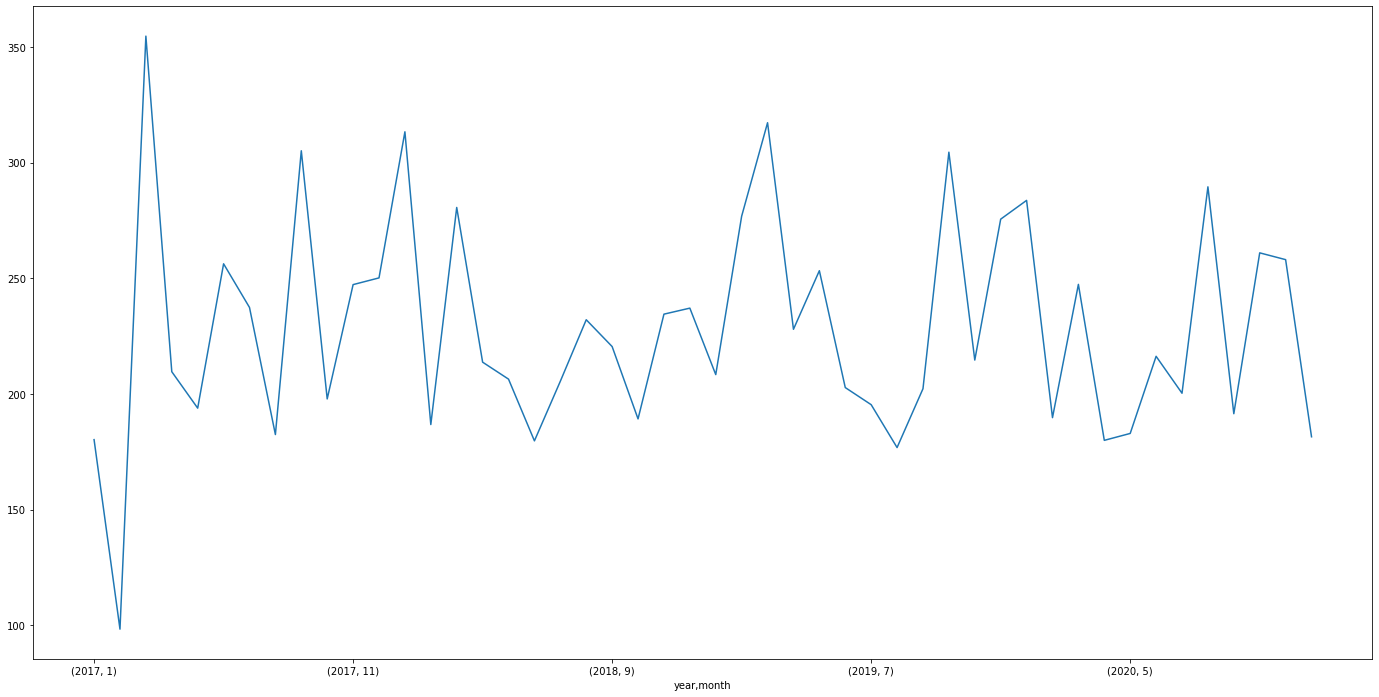

In [18]:
df.groupby(['year','month'])['Sales'].mean().plot(figsize = (24,12))

<AxesSubplot:xlabel='year,month'>

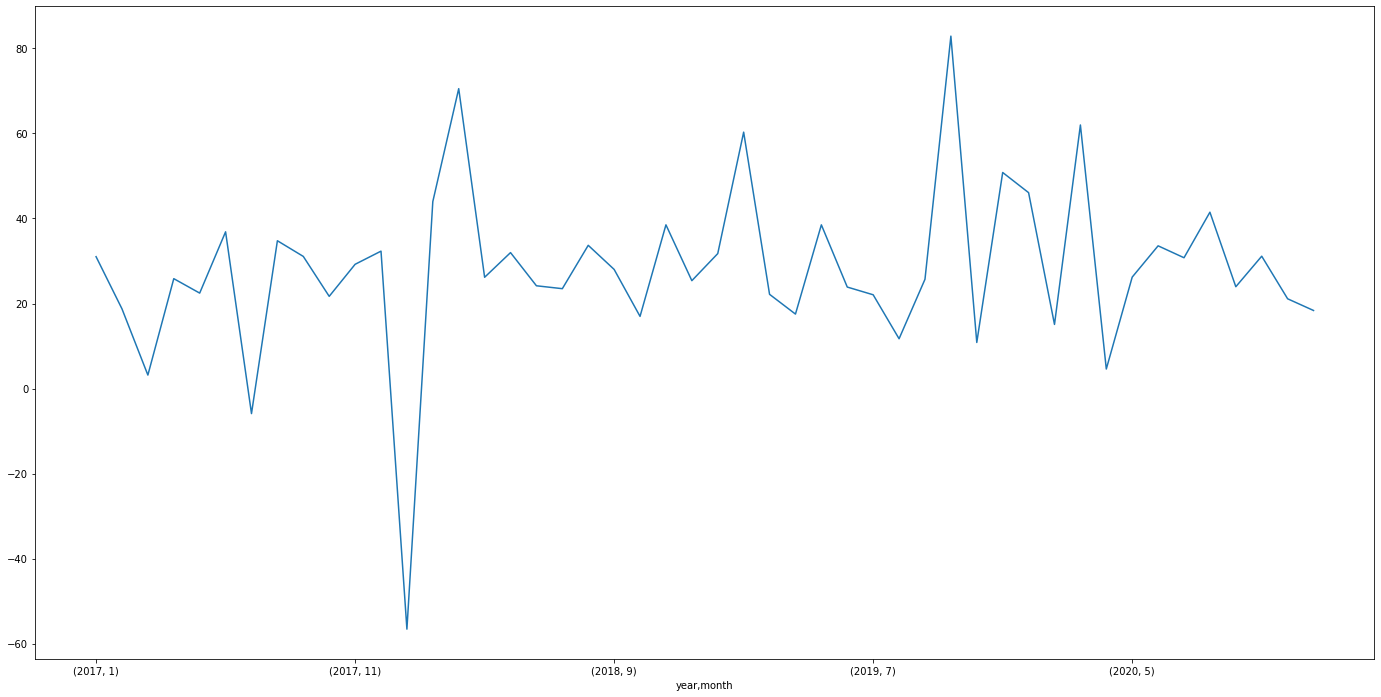

In [19]:
df.groupby(['year','month'])['Profit'].mean().plot(figsize = (24,12))

<AxesSubplot:xlabel='year,month'>

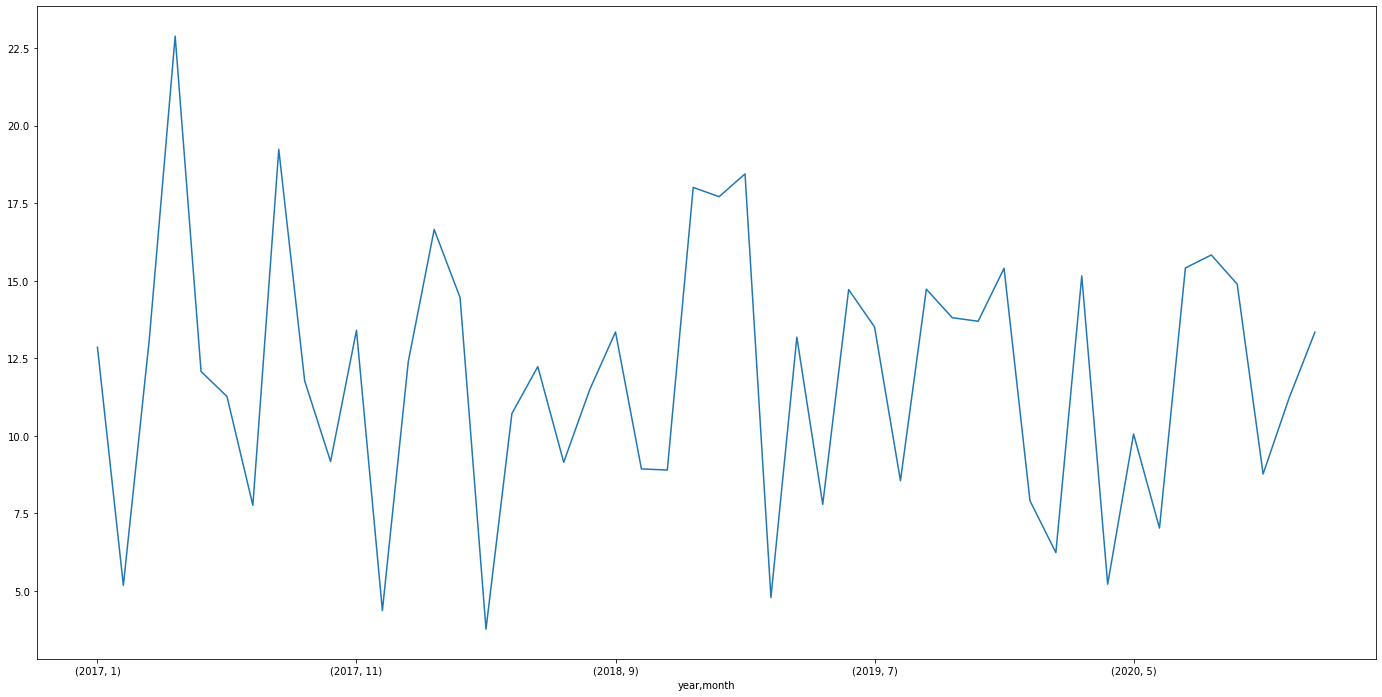

In [79]:
df.groupby(['year','month'])['Profit Percentage'].mean().plot(figsize = (24,12))

<AxesSubplot:xlabel='Category'>

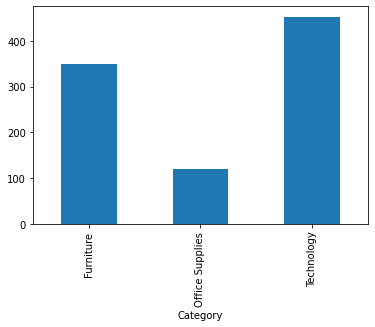

In [20]:
df.groupby('Category')['Sales'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Category'>

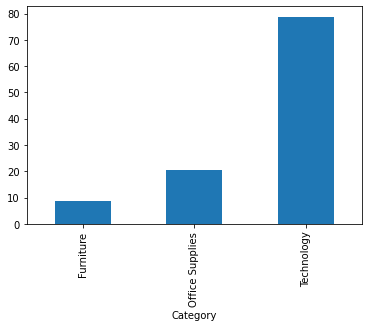

In [21]:
df.groupby('Category')['Profit'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Category'>

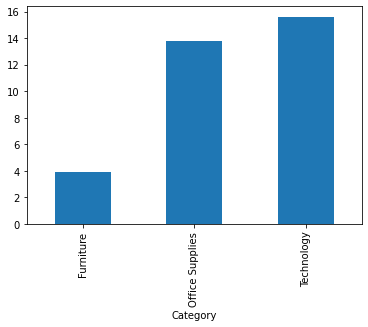

In [78]:
df.groupby('Category')['Profit Percentage'].mean().plot(kind = 'bar')

In [22]:
def func():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Sales'].mean().sort_values(ascending = False).plot(kind = 'bar', subplots = True)
        plt.show()
    


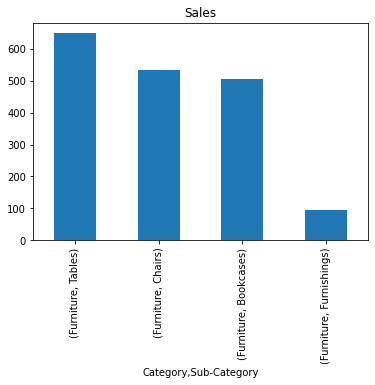

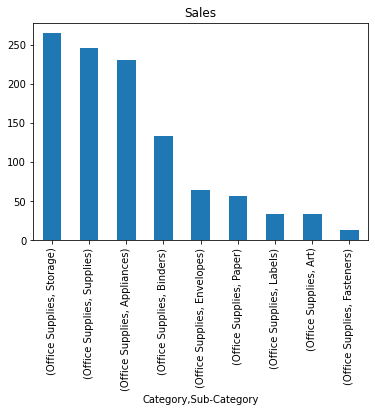

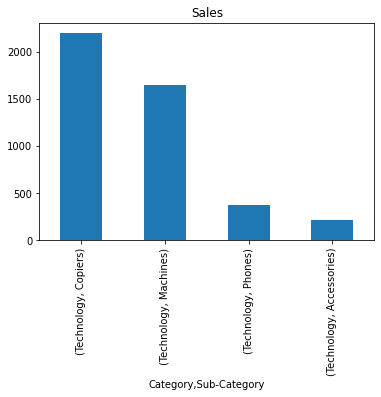

In [23]:
func()

In [24]:
def func2():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Profit'].mean().sort_values(ascending = False).plot(kind = 'bar', subplots = True)
        plt.show()
    


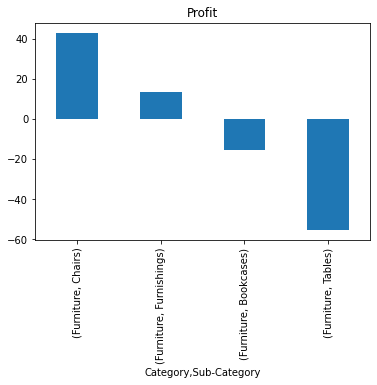

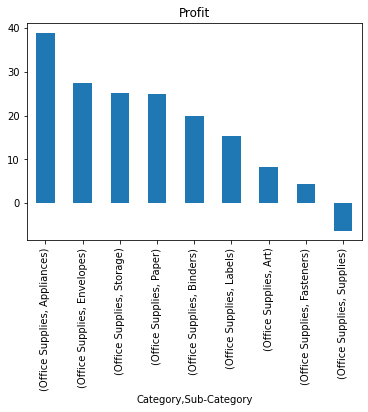

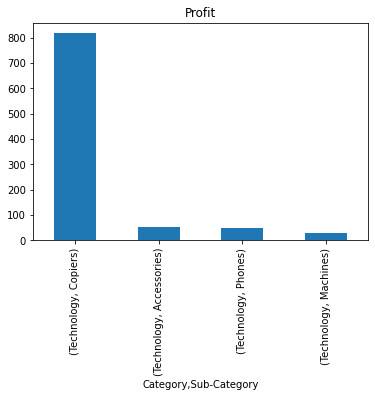

In [25]:
func2()

In [76]:
def func3():
    for c in df['Category'].unique():
        df[df['Category'] == c].groupby(['Category','Sub-Category'])['Profit Percentage'].mean().sort_values(ascending = False).plot(kind = 'bar', subplots = True)
        plt.show()
    


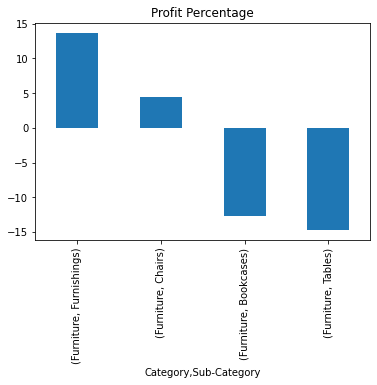

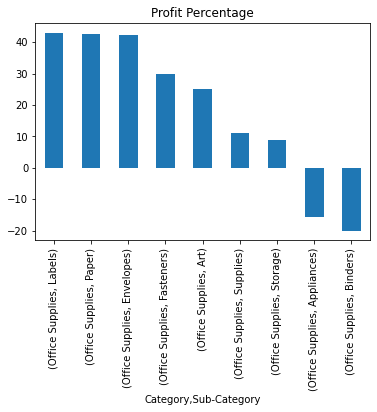

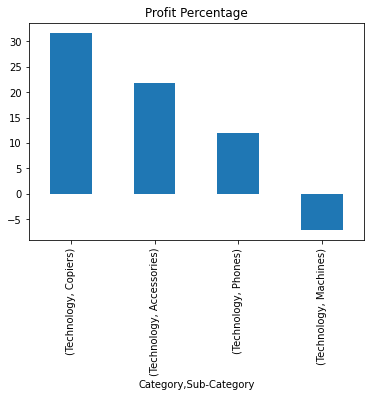

In [77]:
func3()

<AxesSubplot:xlabel='Segment'>

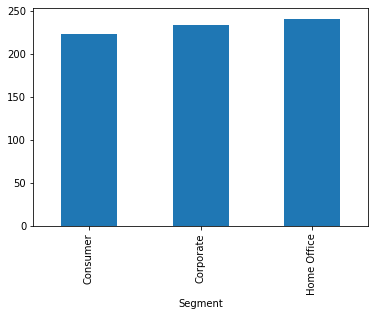

In [26]:
df.groupby('Segment')['Sales'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Segment'>

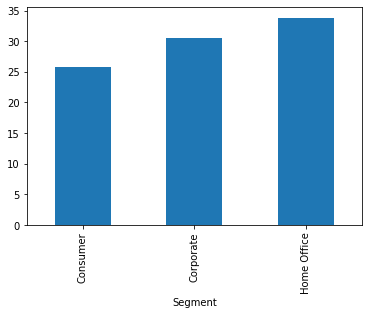

In [27]:
df.groupby('Segment')['Profit'].mean().plot(kind = 'bar')

In [83]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Profit Percentage
0,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2019,16.00
1,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2019,30.00
2,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2019,47.00
3,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2018,-40.00
4,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2018,11.25


In [100]:
df.groupby(['Product Name'], as_index = False)['Sales'].mean().sort_values(by = 'Sales', ascending = False).head(15)

,Product Name,Sales
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480000
404,Canon imageCLASS 2200 Advanced Copier,12319.964800
476,Cubify CubeX 3D Printer Triple Head Print,7999.980000
19,"3D Systems Cube Printer, 2nd Generation, Magenta",7149.945000
786,HP Designjet T520 Inkjet Large Format Printer ...,6124.965000
812,High Speed Automatic Electric Letter Opener,5676.770667
894,Ibico EPK-21 Electric Binding System,5291.972000
984,Lexmark MX611dhe Monochrome Laser Printer,4207.475250
405,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980000
1218,Okidata MB760 Printer,3917.200000


In [98]:
df.groupby(['Product Name'], as_index = False)['Profit'].mean().sort_values(by = 'Profit').head(30)

,Product Name,Profit
476,Cubify CubeX 3D Printer Triple Head Print,-3839.990400
475,Cubify CubeX 3D Printer Double Head Print,-2959.990133
444,Cisco TelePresence System EX90 Videoconferenci...,-1811.078400
984,Lexmark MX611dhe Monochrome Laser Printer,-1147.493250
1837,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.280000
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-575.223120
602,Epson TM-T88V Direct Thermal Printer - Monochr...,-528.615000
364,BoxOffice By Design Rectangular and Half-Moon ...,-382.812500
969,LG G2,-374.992500
372,"Brother MFC-9340CDW LED All-In-One Printer, Co...",-319.191600


<AxesSubplot:xlabel='year,month'>

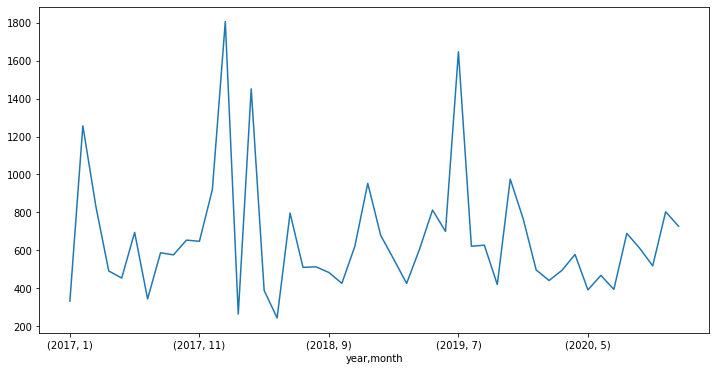

In [31]:
df[df['Sub-Category']=='Tables'].groupby(['year','month'])['Sales'].mean().plot(figsize = (12,6))

<AxesSubplot:xlabel='year,month'>

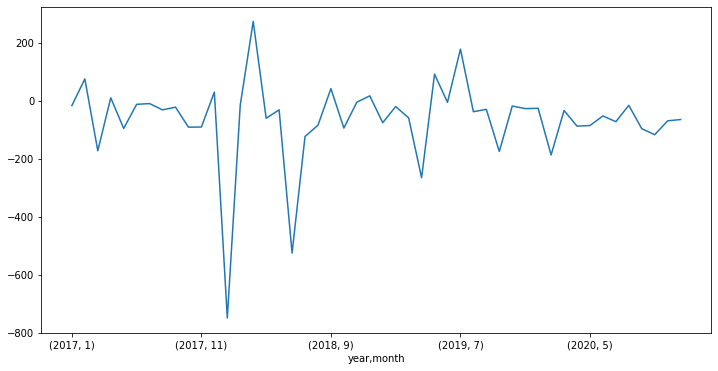

In [32]:
df[df['Sub-Category']=='Tables'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

In [101]:
df.groupby(['Sub-Category'], as_index = False)['Profit'].mean().sort_values(by ='Profit').head(10)

,Sub-Category,Profit
16,Tables,-55.565771
4,Bookcases,-15.230509
15,Supplies,-6.258418
8,Fasteners,4.375660
2,Art,8.200737
9,Furnishings,13.645918
10,Labels,15.236962
3,Binders,19.843574
12,Paper,24.856620
14,Storage,25.152277


In [102]:
df.groupby(['Sub-Category'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage').head(10)

,Sub-Category,Profit Percentage
3,Binders,-19.959510
1,Appliances,-15.686934
16,Tables,-14.772653
4,Bookcases,-12.664007
11,Machines,-7.202622
5,Chairs,4.389963
14,Storage,8.911348
15,Supplies,11.203947
13,Phones,11.922197
9,Furnishings,13.706635


In [103]:
df.groupby(['Sub-Category'], as_index = False)['Profit'].mean().sort_values(by = 'Profit', ascending = False).head(10)

,Sub-Category,Profit
6,Copiers,817.909190
0,Accessories,54.111788
13,Phones,50.073938
5,Chairs,43.095894
1,Appliances,38.922758
11,Machines,29.432669
7,Envelopes,27.418019
14,Storage,25.152277
12,Paper,24.856620
3,Binders,19.843574


In [104]:
df.groupby(['Sub-Category'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage' ,ascending = False).head(10)

,Sub-Category,Profit Percentage
10,Labels,42.966346
12,Paper,42.560036
7,Envelopes,42.313976
6,Copiers,31.719363
8,Fasteners,29.917051
2,Art,25.164573
0,Accessories,21.820968
9,Furnishings,13.706635
13,Phones,11.922197
15,Supplies,11.203947


In [110]:
df.groupby(['Product Name'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage').head(30)

,Product Name,Profit Percentage
604,Eureka Disposable Bags for Sanitaire Vibra Gro...,-275.000000
388,"Bush Westfield Collection Bookcases, Dark Cher...",-210.000000
612,Euro Pro Shark Stick Mini Vacuum,-177.500000
17,3.6 Cubic Foot Counter Height Office Refrigerator,-148.400000
1214,Okidata B401 Printer,-140.000000
1837,Zebra GK420t Direct Thermal/Thermal Transfer P...,-133.333333
861,Hoover Commercial Lightweight Upright Vacuum,-131.250000
947,Kensington 6 Outlet SmartSocket Surge Protector,-125.000000
50,Acco 6 Outlet Guardian Basic Surge Suppressor,-116.000000
51,Acco 6 Outlet Guardian Premium Plus Surge Supp...,-113.000000


In [106]:
df.groupby(['Product Name'], as_index = False)['Profit Percentage'].mean().sort_values(by = 'Profit Percentage' ,ascending = False).head(10)

,Product Name,Profit Percentage
1672,Xerox 1890,50.0
1473,Southworth Structures Collection,50.0
109,Adams Telephone Message Book w/Frequently-Call...,50.0
1566,Tops Green Bar Computer Printout Paper,50.0
181,Avery 475,50.0
405,Canon imageCLASS MF7460 Monochrome Digital Las...,50.0
1757,Xerox 1969,49.0
1777,Xerox 1987,49.0
208,Avery 5,49.0
1702,Xerox 1918,49.0


In [34]:
df.groupby(['Region'])['Sales'].mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [35]:
df.groupby(['Region'])['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year'>

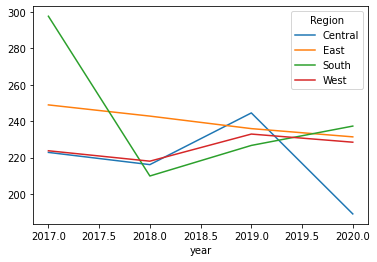

In [36]:
df.groupby(['year','Region'])['Sales'].mean().unstack().plot()

In [42]:
df.groupby(['State'])['Profit'].mean().sort_values().head(10)

State
Ohio             -36.186304
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.507598
Texas            -26.121174
Illinois         -25.625787
Arizona          -15.303235
Oregon            -9.600569
Florida           -8.875461
Name: Profit, dtype: float64

In [43]:
df.groupby(['State'])['Profit'].mean().sort_values(ascending = False).head(10)

State
Vermont                 204.088936
Rhode Island            130.100523
Indiana                 123.375411
Montana                 122.221900
Minnesota               121.608847
District of Columbia    105.958930
Delaware                103.930988
Wyoming                 100.196000
Missouri                 97.518341
Michigan                 95.934069
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year,month'>

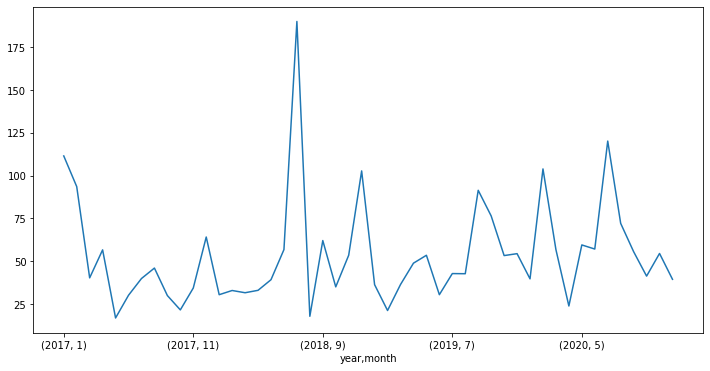

In [38]:
df[df['Sub-Category']=='Accessories'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

<AxesSubplot:xlabel='year,month'>

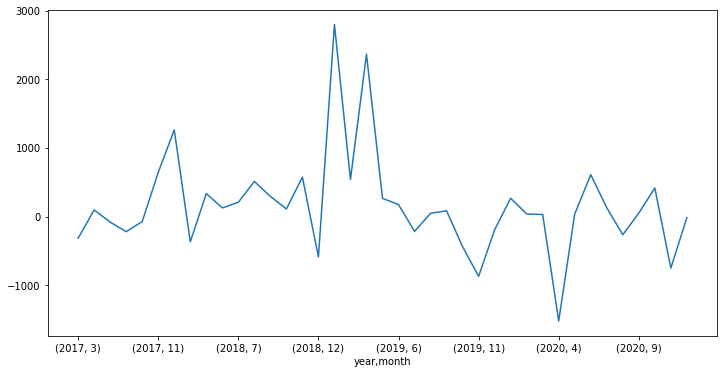

In [46]:
df[df['Sub-Category']=='Machines'].groupby(['year','month'])['Profit'].mean().plot(figsize = (12,6))

In [108]:
df[df['Sub-Category']=='Tables']['Profit'].sum()

-17725.481100000005